In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 初期スピン配位の生成
def initial_config(size_lat):
    return 2*(np.random.randint(0,2,size=(size_lat, size_lat, size_lat))-1/2)

# Isingモデルのハミルトニアン（交換相互作用と外場）
def hamiltonian_ising(arr_spin, coupling, ex_field):
    n0, n1, n2 = np.shape(arr_spin)
    hamiltonian = 0.0
    for i in range(-1,n0-1):
        for j in range(-1,n1-1):
            for k in range(-1, n2-1):
                hamiltonian += -coupling*(arr_spin[i][j][k]*arr_spin[i][j][k+1] 
                                          + arr_spin[i][j][k]*arr_spin[i][j+1][k]
                                          + arr_spin[i][j][k]*arr_spin[i+1][j][k])
    hamiltonian += -ex_field*np.sum(arr_spin)
    return hamiltonian

# メトロポリス法にしたがってスピン配位を更新する
def update_config(arr_spin, temp, coupling, ex_field):
    n0, n1, n2 = np.shape(arr_spin)
    energy = hamiltonian_ising(arr_spin, coupling, ex_field)
    for i in range(0, n0):
        for j in range(0, n1):
            for k in range(0, n2):
                diff_energy = diff_flip(arr_spin, n0, n1, n2, i, j, k, coupling, ex_field)
                if diff_energy < 0:
                    energy += diff_energy
                elif np.random.rand() < np.exp(-diff_energy/temp):
                    energy += diff_energy
                else:
                    arr_spin[i][j][k] = -arr_spin[i][j][k] #スピンフリップの副作用の処理
    return arr_spin

# スピンをフリップした際のハミルトニアンの差分を出力（スピンフリップの副作用あり）
def diff_flip(arr_spin, n0, n1, n2, i, j, k, coupling, ex_field):
    arr_spin[i][j][k] = -arr_spin[i][j][k]
    fliped = 0.0
    fliped += -coupling*(arr_spin[i][j][k]*arr_spin[i-1][j][k] + arr_spin[i][j][k]*arr_spin[-n0+i+1][j][k] 
                         + arr_spin[i][j][k]*arr_spin[i][j-1][k] + arr_spin[i][j][k]*arr_spin[i][-n1+j+1][k]
                         + arr_spin[i][j][k]*arr_spin[i][j][k-1] + arr_spin[i][j][k]*arr_spin[i][j][-n2+k+1]) \
              -ex_field*arr_spin[i][j][k]
    return 2*fliped
    
# 温度に対する1サイト当たりの磁化の計算とその温度-磁化グラフのプロット
# T_c = 4.5くらいらしい
def magnetization_plot(size_lat, temp_min, temp_max, coupling, ex_field):
    num_update = 60
    num_update_sub = 40
    sampling_interval = 2
    num_step = 100
    mag_lst =[]
    mag_samples = []
    temp_lst = np.linspace(temp_min, temp_max, num_step)
    
    arr_spin=initial_config(size_lat)
    
    for temp_tmp in temp_lst:
        mag_samples = []

        for i in range(0, num_update):
            update_config(arr_spin, temp_tmp, coupling, ex_field)

        for i in range(0, num_update_sub):
            update_config(arr_spin, temp_tmp, coupling, ex_field)
            if (i+1)%sampling_interval==0:
                mag_samples.append(np.sum(arr_spin)/len(arr_spin)**3)

        mag_lst.append(np.sum(mag_samples)/len(mag_samples))
    
    plt.plot(temp_lst, mag_lst)
    plt.grid(True)
    plt.ylabel("magnetization per cite")
    plt.xlabel("T")
    plt.show()

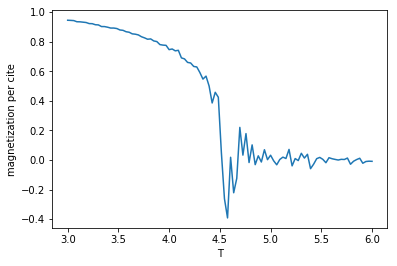

CPU times: user 7min 47s, sys: 368 ms, total: 7min 48s
Wall time: 7min 47s


In [15]:
%%time
magnetization_plot(16, 3.0, 6.0, 1.0, 0.0)

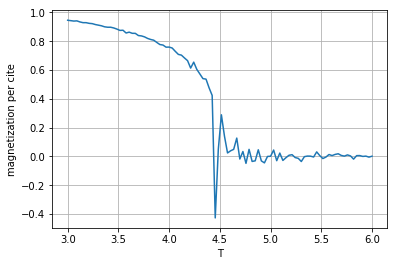

CPU times: user 18min 38s, sys: 256 ms, total: 18min 38s
Wall time: 18min 38s


In [27]:
%%time
magnetization_plot(16, 3.0, 6.0, 1.0, 0.0)